# MNIST

Dataset contains images of hand written numbers. The problem is to predict the number in the image.

each image is of 28x28 pixels.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Data


In [3]:

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


from the above output it is clear that there are total of 60000 images each of size 28x28 pixels and there are total of 60000 labels.

#Visualize Examples

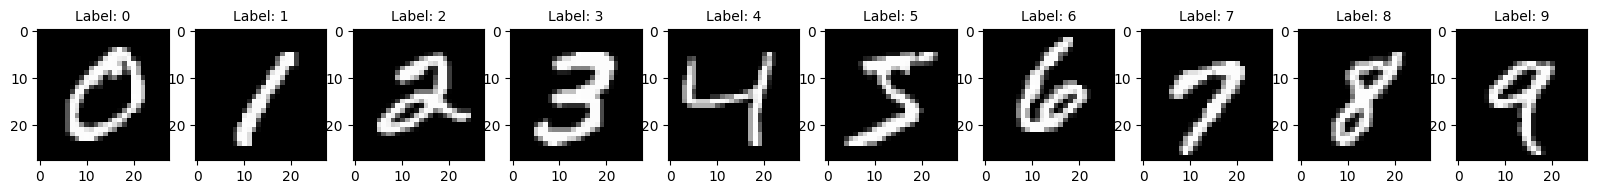

In [5]:
# There are total of 10 classes(0 to 9)
num_classes = 10
# Configure subplots to plot the images
f, ax = plt.subplots(1, num_classes,figsize=(20,20))
# run a for loop to get each image from the x_train data where index is equal to label(i)
for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=10)

In [6]:
# print labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Above convertion of the labels is called one-hot encoding. used to convert numbers into a cateforical format or vectorize the labels so it is optimal for the machine learning model to use the labels.

In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#prepare data

In [9]:
#Normalize data
x_train = x_train/255
x_test = x_test/25

In [10]:
#reshape data
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Create Model  - Fully Connected Layer

In [11]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train

In [12]:
batch_size = 512
epoches = 10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epoches)

Epoch 1/10
118/118 [==============================] - 3s 17ms/step - loss: 0.5836 - accuracy: 0.8310
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.2225 - accuracy: 0.9356
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1650 - accuracy: 0.9515
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1325 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 6/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0911 - accuracy: 0.9726
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0801 - accuracy: 0.9758
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0619 - accuracy: 0.9815
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0541 - accura

#Evaluate

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.9756
Test loss: 0.5055991411209106
Test accuracy: 0.975600004196167


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[[0.0000000e+00 0.0000000e+00 2.8833836e-36 ... 9.9999994e-01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 9.9999994e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 9.9999994e-01 7.5148550e-34 ... 4.2946599e-34
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[7 2 1 ... 4 5 6]


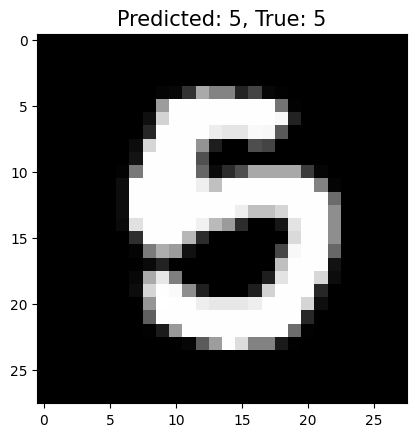

In [18]:
#single example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=15)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

#Confusion Matrix


Text(70.72222222222221, 0.5, 'True Label')

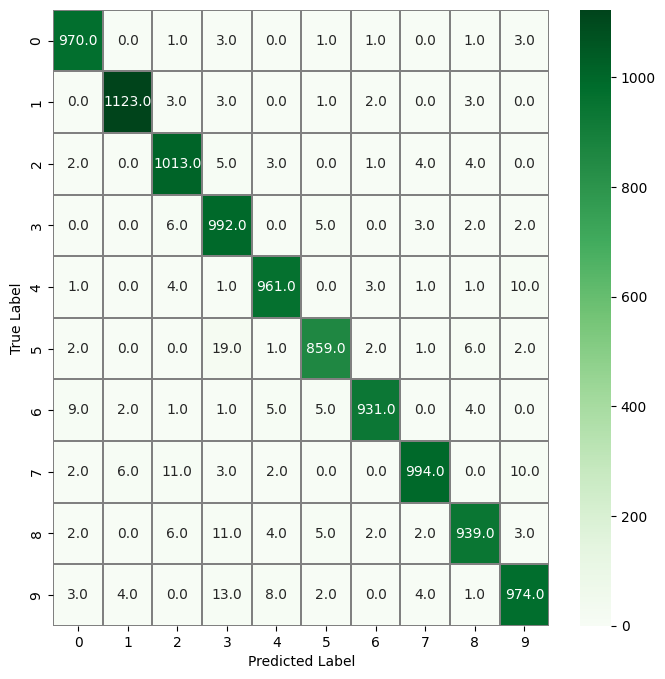

In [19]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#Investigate Errors

In [20]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_test[errors]

In [21]:
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

#get list of indices of the sorted differences
sorted_delta_errors = np.argsort(delta_pred_true_errors)
top_idx_delta_errors = sorted_delta_errors[-10:] #last 10

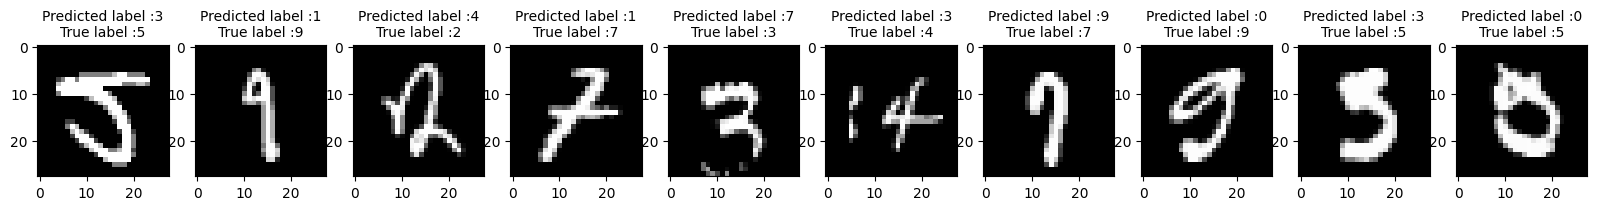

In [23]:
#show top errors
num = len(top_idx_delta_errors)
f, ax = plt.subplots(1,num,figsize=(20,20))

for i in range(num):
  idx = top_idx_delta_errors[i]
  sample = x_val_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label :{}".format(y_p,y_t), fontsize=10)
